In [26]:
import torch
from models.resnet import Resnet
from file_utils import read_json
from models.task import get_task
from models.decoder import get_decoder
import matplotlib.pyplot as plt



args = {}
args_path = "/home/luiz.decker/code/DepthTasks/logs/resnet_depth_midair_scratch/_0/args.json"
args.update(read_json(args_path))

if "tasks" in args:
    task_list = []
    for task in args["tasks"]:
        Task = get_task(task["type"])
        Decoder = get_decoder(task["decoder"]["type"])

        _task = Task(
            name=task["name"],
            decoder=Decoder,
            features=task["features"],
            channels=task["channels"],
            mask_feature=task.get("mask_feature"),
            decoder_args=task["decoder"]["args"],
            train_on_disparity=task.get("train_on_disparity", False),
        )

        task_list.append(_task)
    args["tasks"] = task_list


modelpath = "/home/luiz.decker/code/DepthTasks/logs/resnet_depth_midair_scratch/_0/lightning_logs/version_0/checkpoints/epoch=30-step=273575.ckpt"
model_weights = torch.load(modelpath)

model = Resnet(tasks=args['tasks'], features=args['features'],pretrained_encoder=False)

model.load_state_dict(model_weights['state_dict'])

<All keys matched successfully>

In [3]:
args

{'config': 'configs/config_midair.json',
 'expname': 'resnet_depth_midair',
 'dataset': 'midair',
 'num_workers': 8,
 'target_size': [256, 256],
 'depth_clip': None,
 'mask_sky': False,
 'dataset_root': '/hadatasets/midair/MidAir',
 'batch_size': 32,
 'epochs': 100,
 'split_json': 'configs/midair_splits.json',
 'features': [['image_l'], ['depth_l']],
 'tasks': [<models.task.DenseRegression at 0x7fcfe69e9940>]}

In [4]:
from datasets.nyu import NYUDepthV2
args['split_json'] = "/home/luiz.decker/code/DepthTasks/configs/nyu.json"
args["dataset_root"] = "/hadatasets/nyu"

nyu_val_ds = NYUDepthV2(split='validation', **args)

In [5]:
from datasets.midair import MidAir
args['split_json'] = "/home/luiz.decker/code/DepthTasks/configs/midair_splits.json"
args['dataset_root'] = "/hadatasets/midair/MidAir"

midair_val_ds = MidAir(split='validation', **args)

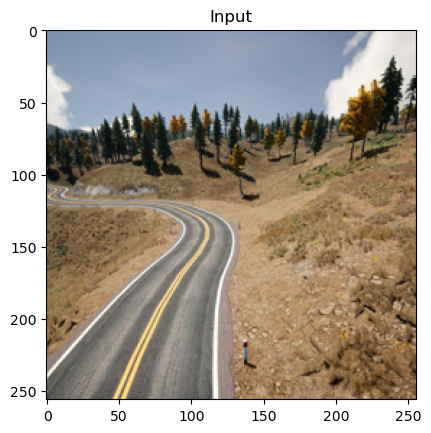

In [22]:
img, _ = midair_val_ds[110000]
plt.imshow(img.squeeze(dim=(0)).swapaxes(0,2).swapaxes(0,1))
plt.title("Input")
plt.show()

141290


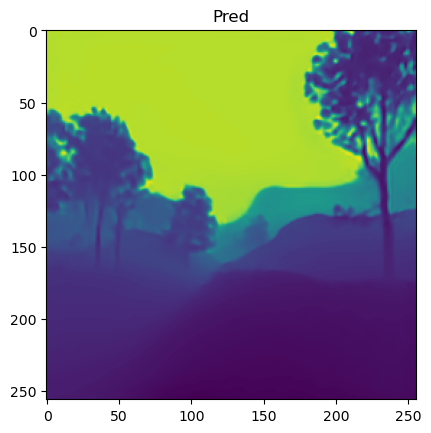

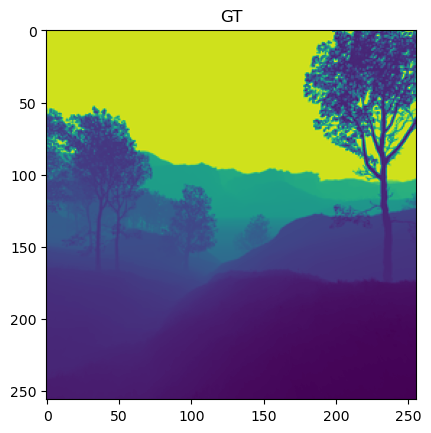

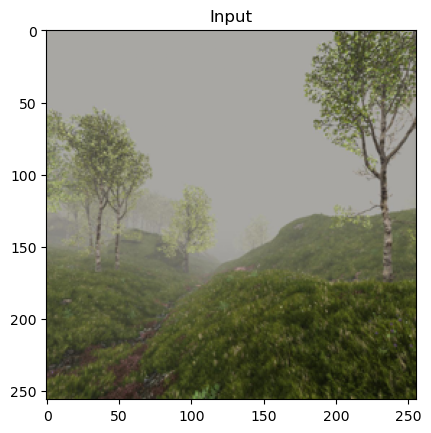

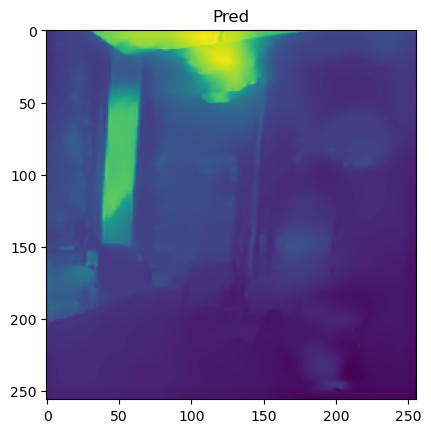

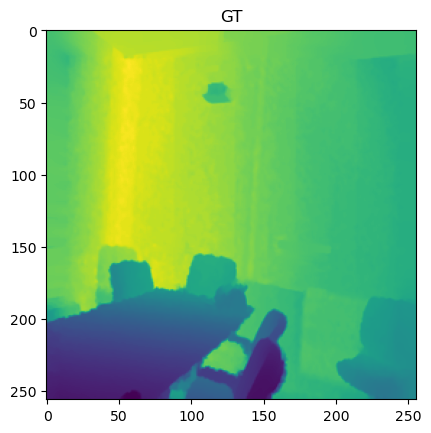

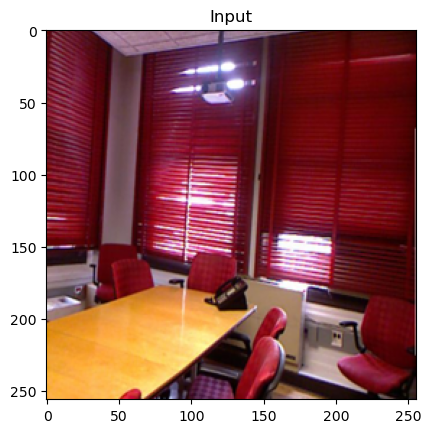

In [28]:
print(len(midair_val_ds))

ids_midair = [200, 50000, 50200, 110000]

def plot_all(img,depth,model):
    pred = model(img.unsqueeze(dim=1)).detach().numpy()
    plt.imshow(pred.squeeze(axis=(0,1)).swapaxes(0,2).swapaxes(0,1))
    plt.title("Pred")
    plt.show()
    plt.imshow(depth.squeeze(dim=(0)).swapaxes(0,2).swapaxes(0,1))
    plt.title("GT")
    plt.show()
    plt.imshow(img.squeeze(dim=(0)).swapaxes(0,2).swapaxes(0,1))
    plt.title("Input")
    plt.show()

idx = 200
m_img, m_depth = midair_val_ds[idx]

idx = 20
n_img, n_depth = nyu_val_ds[idx]

plot_all(m_img,m_depth,model)
plot_all(n_img,n_depth,model)
